In [1]:
import sys 
sys.path.append('..')

import torch
import torch.nn.functional as F
import numpy as np
from scipy import signal

%load_ext autoreload
%autoreload 2
from networks import *
from utils import *
from losses import *
from test_utils import *

import matplotlib.pyplot as plt
from matplotlib import cm
from math import ceil


/home/dekape/miniconda3/lib/python3.7/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: /home/dekape/miniconda3/lib/python3.7/site-packages/torchvision/image.so: undefined symbol: _ZNK3c106IValue23reportToTensorTypeErrorEv
  warn(f"Failed to load image Python extension: {e}")


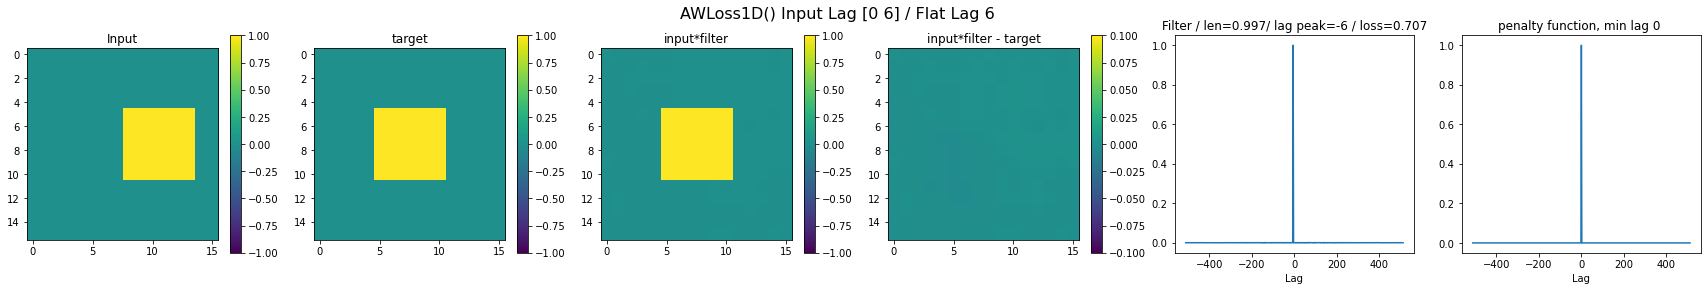

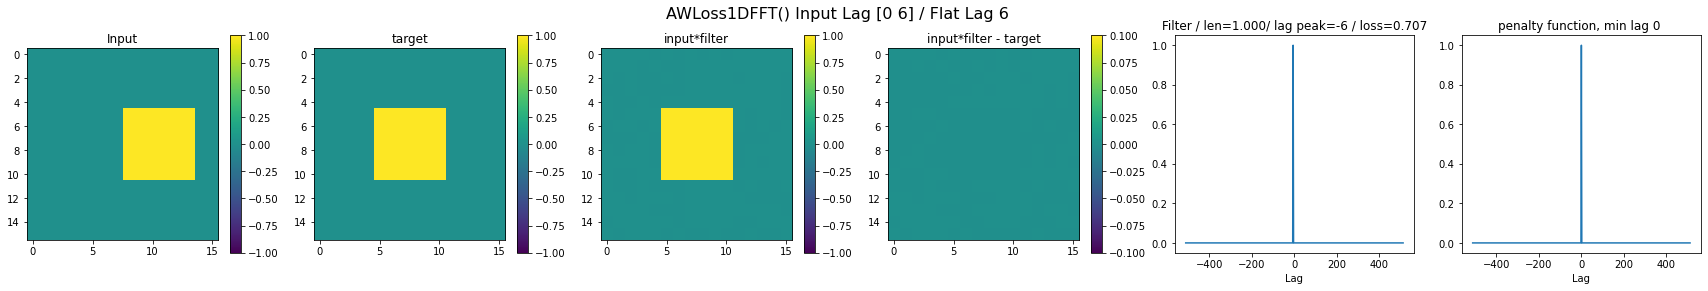

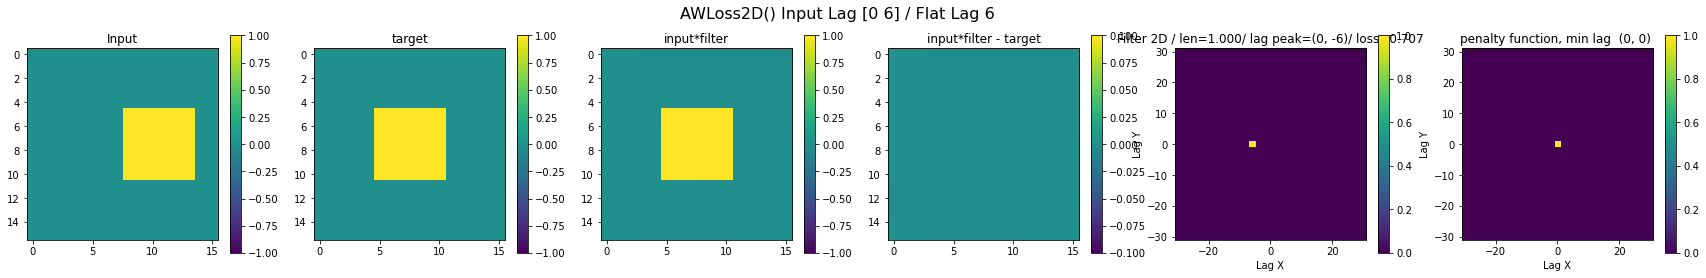

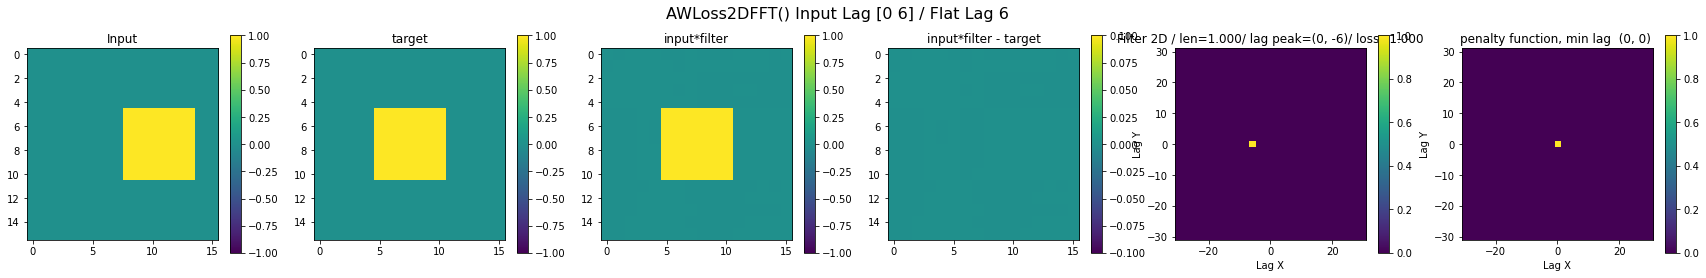

In [3]:
n = 16
nc = 1
losses = [
    AWLoss1D(store_filters=True),
    AWLoss1DFFT(store_filters=True, epsilon=3e-15),
    AWLoss2D(store_filters=True),
    AWLoss2DFFT(store_filters=True),
    ]

for awi_loss in losses:
    r = 3
    lag = np.array([0, 0])
    lag = np.array([0, 6])
    flatlag = n*lag[0] + lag[1]
    input = square_img((n, n), lag=lag, radius=r).unsqueeze(0).unsqueeze(0).repeat(1, nc, 1, 1) 
    target = square_img((n, n), lag=(0, 0), radius=r).unsqueeze(0).unsqueeze(0).repeat(1, nc, 1, 1) 
    test_loss(input, target, awi_loss, figtitle="{} Input Lag {} / Flat Lag {}".format(awi_loss, lag, flatlag))


AWLoss2D()


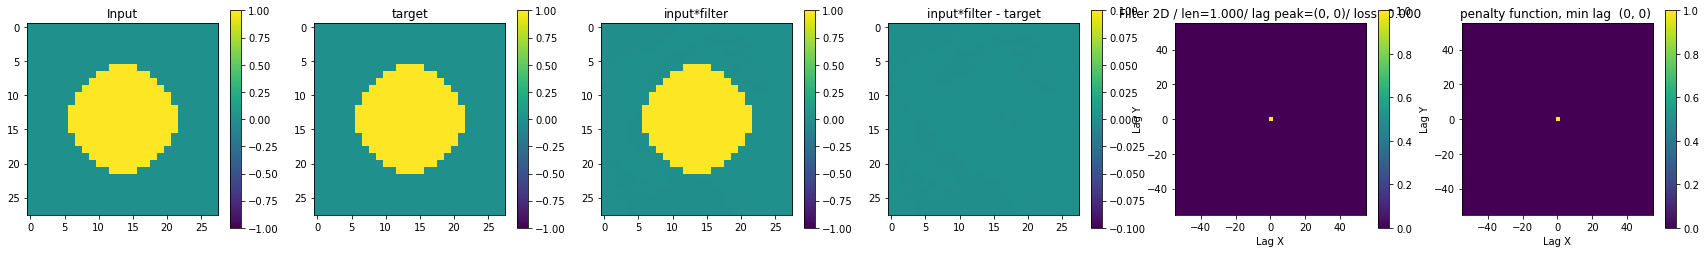

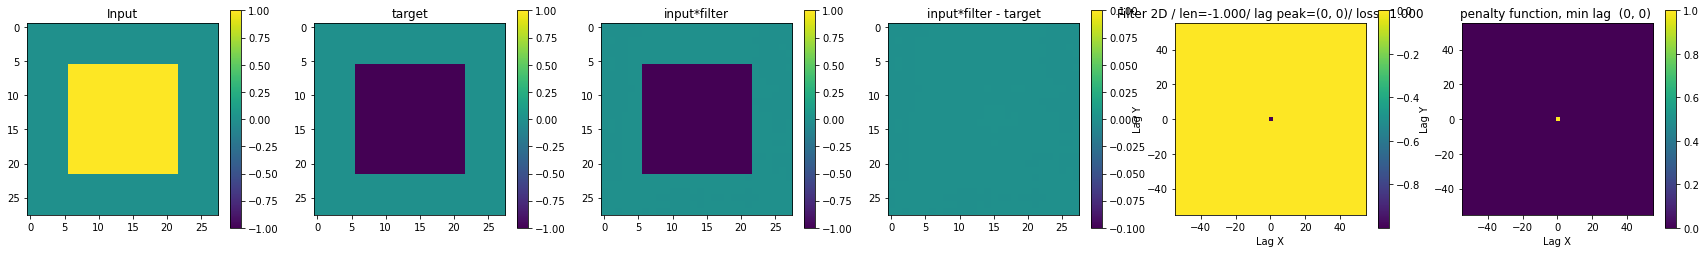

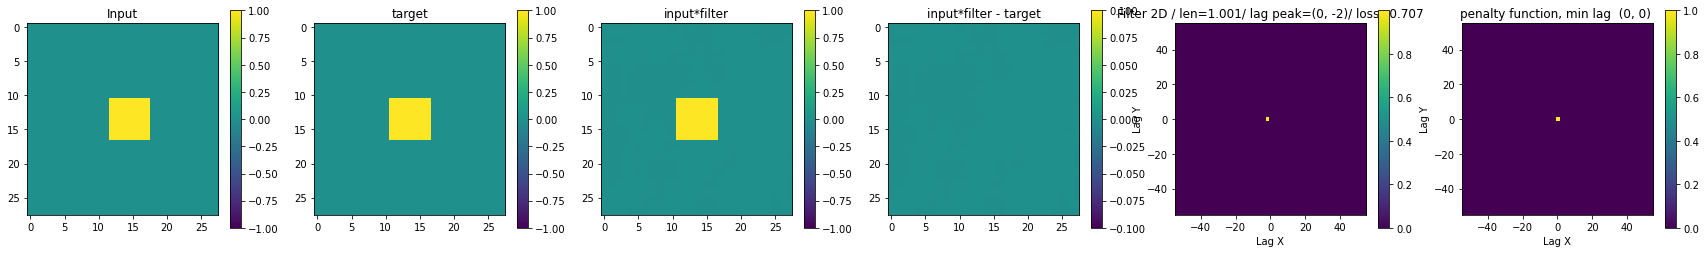

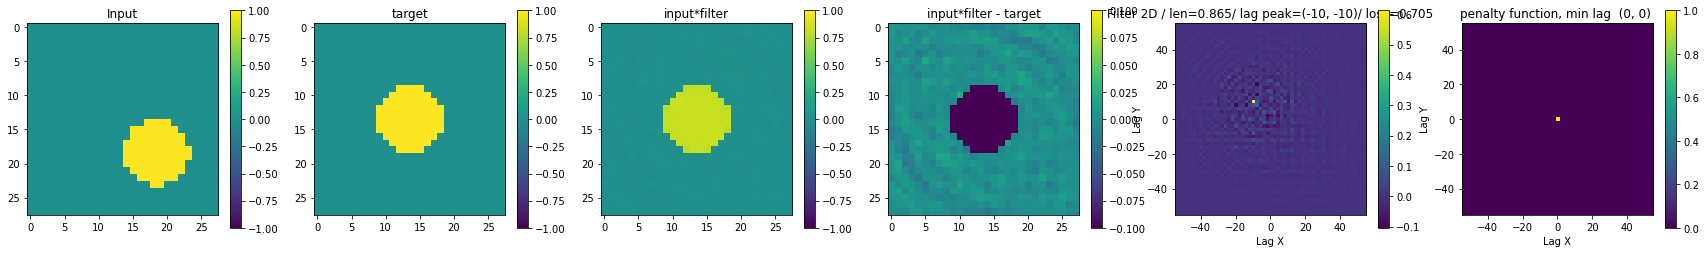

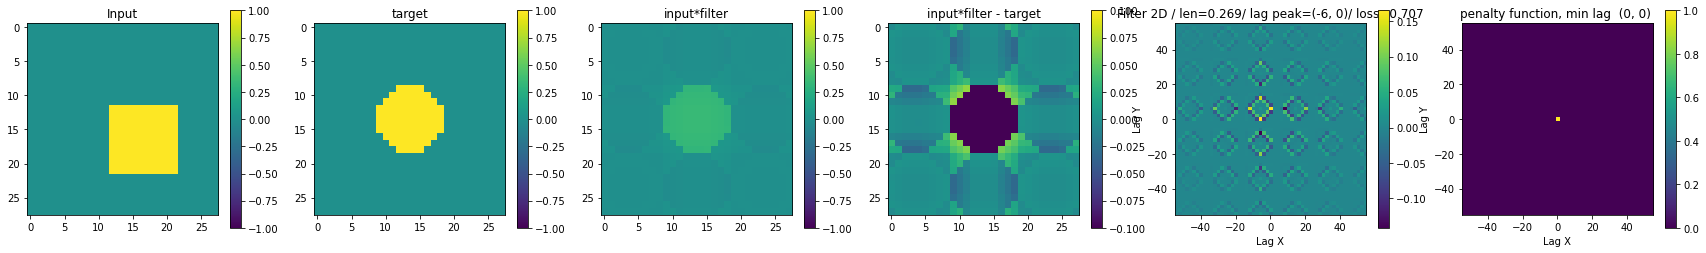

AWLoss2DFFT()


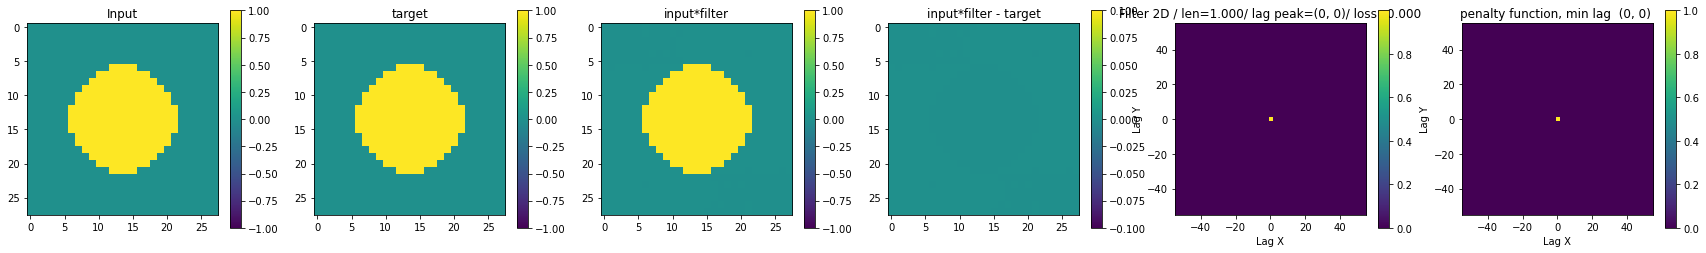

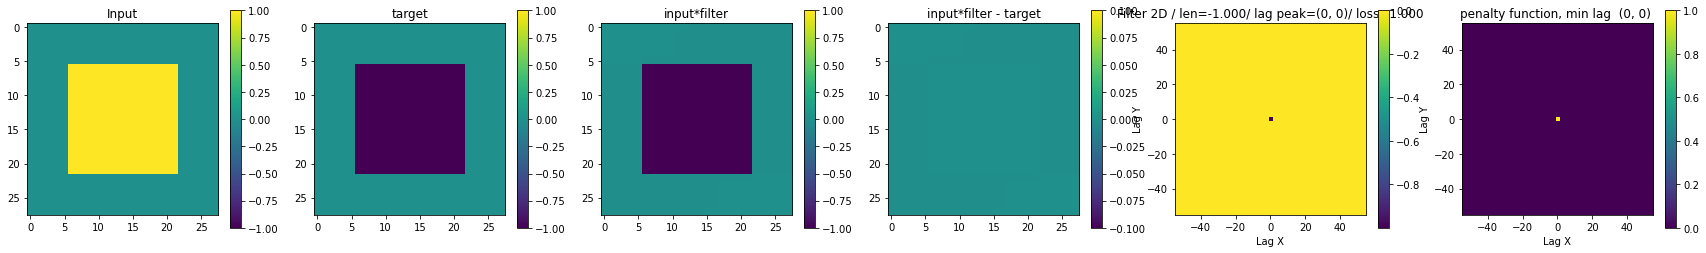

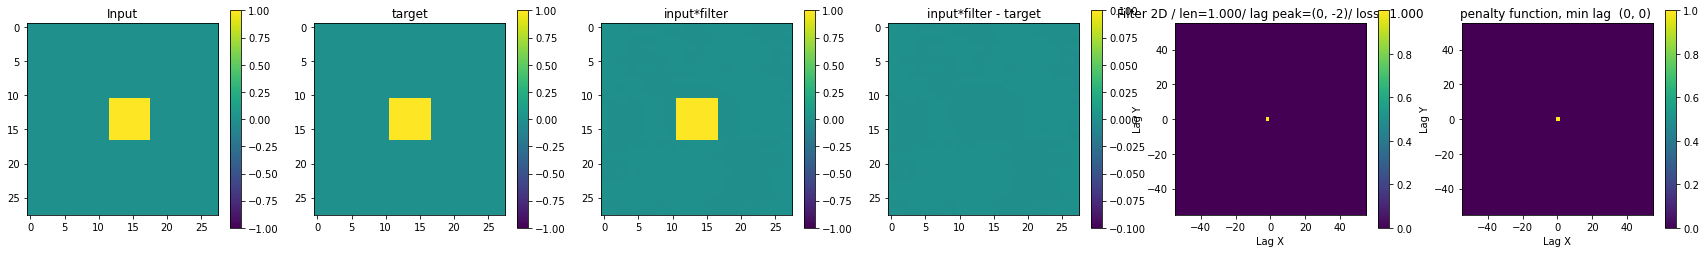

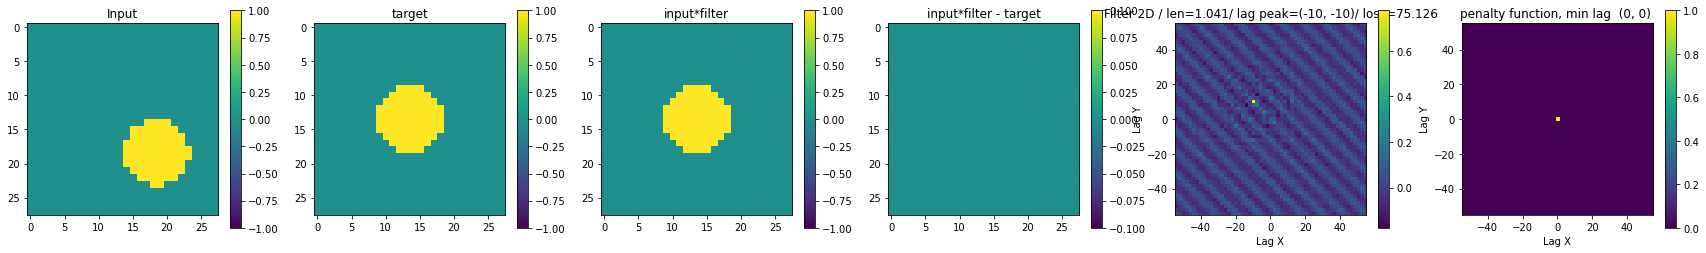

ValueError: only one element tensors can be converted to Python scalars

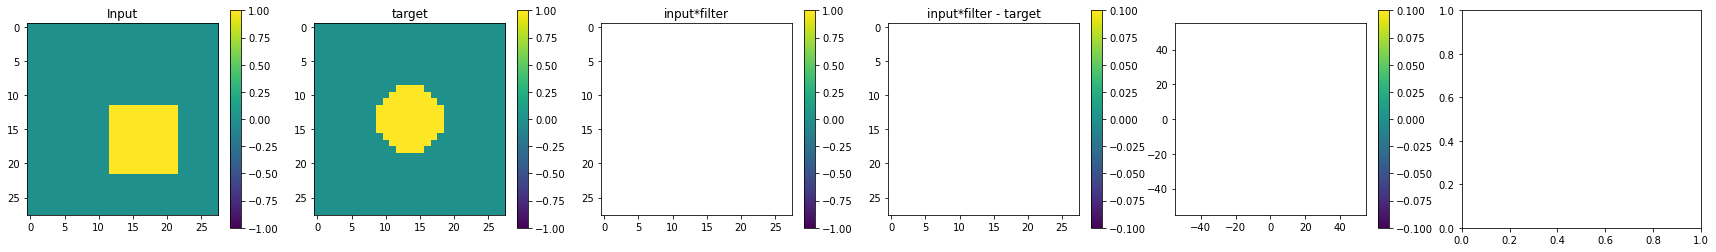

In [7]:
n = 28
e = 3e-55
losses = [
    # AWLoss1D(store_filters=True, epsilon=e),
    # AWLoss1DFFT(store_filters=True, epsilon=e),
    AWLoss2D(store_filters=True, epsilon=e),
    AWLoss2DFFT(store_filters=True, epsilon=e),
    ]

for awi_loss in losses:
    print(awi_loss)
    
    # P = torch.zeros(1,1,n,n)
    # for i in range(n):
    #     P[0, 0, i, :] = (torch.ones(1, n) + i)/n
        
    # input,  target = P[:], P[:]
    # test_loss(input, target, awi_loss)

    # input, target = P[:], torch.flipud(P[0, 0]).unsqueeze(0).unsqueeze(0)
    # test_loss(input, target, awi_loss)

    # input, target = torch.transpose(P, dim0=2, dim1=3), torch.flipud(P[0, 0]).unsqueeze(0).unsqueeze(0)
    # test_loss(input, target, awi_loss)

    # input, target = torch.transpose(P, dim0=2, dim1=3), torch.flipud(P[0, 0]).unsqueeze(0).unsqueeze(0)
    # test_loss(input, target, awi_loss)

    # for i in range(n):
    #     P[0, 0, :, i] = torch.ones(1, n) + i
    # input, target = P[:], torch.fliplr(P[0, 0]).unsqueeze(0).unsqueeze(0)
    # test_loss(input, target, awi_loss)

    # circle = circle_img((n, n), lag=(15, 15), radius=8).unsqueeze(0).unsqueeze(0)
    # target, input = circle, circle
    # test_loss(input, target, awi_loss)

    # circle = circle_img((n, n), lag=(-15, -15), radius=8).unsqueeze(0).unsqueeze(0)
    # target, input = circle, circle
    # test_loss(input, target, awi_loss)

    # circle = circle_img((n, n), lag=(0, -15), radius=8).unsqueeze(0).unsqueeze(0)
    # target, input = circle, circle
    # test_loss(input, target, awi_loss)



    circle = circle_img((n, n), lag=(0, 0), radius=8).unsqueeze(0).unsqueeze(0)
    target, input = circle, circle
    test_loss(input, target, awi_loss)

    square = square_img((n, n), lag=(0, 0), radius=8).unsqueeze(0).unsqueeze(0)
    target, input = square*(-1), square
    test_loss(input, target, awi_loss)

    square = square_img((n, n), lag=(0, 2), radius=3).unsqueeze(0).unsqueeze(0)
    input, target = square, square_img((n, n), lag=(0, 0), radius=3).unsqueeze(0).unsqueeze(0)
    test_loss(input, target, awi_loss)
    
    lag = (10, 10)
    r = 5
    input = circle_img((n, n), lag=lag, radius=r).unsqueeze(0).unsqueeze(0)
    target = circle_img((n, n), lag=(0, 0), radius=r).unsqueeze(0).unsqueeze(0)
    test_loss(input, target, awi_loss)

    lag = (6, 6)
    r = 5
    input = square_img((n, n), lag=lag, radius=r).unsqueeze(0).unsqueeze(0)
    target = circle_img((n, n), lag=(0, 0), radius=r).unsqueeze(0).unsqueeze(0)
    test_loss(input, target, awi_loss)
